In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_pad = "/Users/hbraakmann/Downloads/ext_nat_monvogblvmtnter010021.csv"
df = pd.read_csv(data_pad)
df.head()

,FID,geom,projectid,plotid,kopid,plotnummer,plotnaam,jaar,euring,naam,aantal,broedcode,opmerking
0,ext_nat_monvogblvmtnter010021.1,POINT (64394.414185527654 401520.85710462555),252,9850,151158,3931,Winkelz-watergang,2018,6680,Holenduif,1,2,NaN
1,ext_nat_monvogblvmtnter010021.2,POINT (65399.49273271591 401436.27965591673),252,9850,151158,3931,Winkelz-watergang,2018,4500,Scholekster,1,13,NaN
2,ext_nat_monvogblvmtnter010021.3,POINT (64152.14976041649 401341.4443999769),252,9850,151158,3931,Winkelz-watergang,2018,10171,Gele Kwikstaart,1,2,NaN
3,ext_nat_monvogblvmtnter010021.4,POINT (64852.05473257492 401019.86425183626),252,9850,151158,3931,Winkelz-watergang,2018,12510,Kleine Karekiet,1,2,NaN
4,ext_nat_monvogblvmtnter010021.5,POINT (64600.23110441111 401038.8781992914),252,9850,151158,3931,Winkelz-watergang,2018,11060,Blauwborst,1,2,NaN


In [4]:
df_2021 = df.loc[df["jaar"] == 2021]
bio_div_2021 = (df_2021.groupby("plotnaam")["naam"].agg(["nunique", "count"])
           .reset_index()
           .rename(columns={"nunique": "soorten_2021", "count": "aantal_2021"})
          )
bio_div_2021

df_2010 = df.loc[df["jaar"] == 2010]
bio_div_2010 = (df_2010.groupby("plotnaam")["naam"].agg(["nunique", "count"])
           .reset_index()
           .rename(columns={"nunique": "soorten_2010", "count": "aantal_2010"})
          )
bio_div_2010

merged = pd.merge(bio_div_2010, bio_div_2021, on="plotnaam")
merged = merged[["plotnaam", "aantal_2010", "aantal_2021", "soorten_2010", "soorten_2021"]]
merged

,plotnaam,aantal_2010,aantal_2021,soorten_2010,soorten_2021
0,Austerl-Veerh.polder,35,159,13,49
1,Baarsdorp,39,97,20,32
2,Bouwmansweg Haamstede SD,140,170,36,42
3,Brandkreekpolder,67,132,26,42
4,Dullaertpolder,33,178,11,45
5,Eversdijk,49,111,20,39
6,Frederiksdijk NB,195,213,41,42
7,Karrevelden Scharendijke,165,173,41,43
8,Kievitshoek,152,168,38,43
9,Molenkreek Schoondijke,53,171,24,51


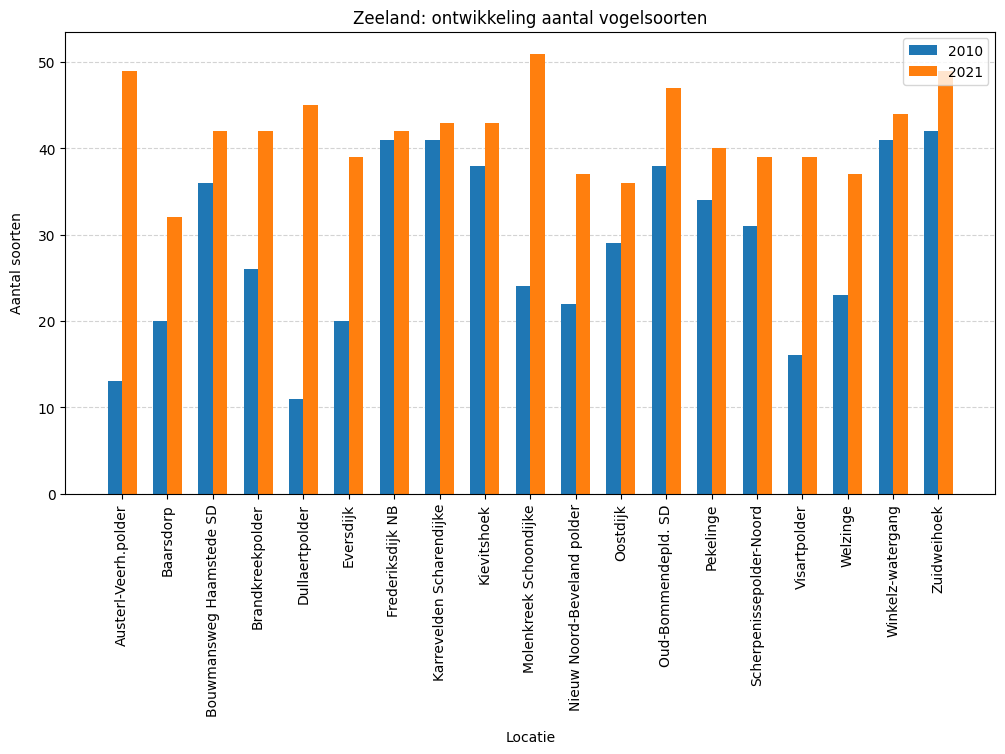

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(merged["plotnaam"]))
width = 0.32

bars_1 = ax.bar(x - width/2, merged["soorten_2010"], width, label="2010", zorder=2)
bars_2 = ax.bar(x + width/2, merged["soorten_2021"], width, label="2021", zorder=2)

ax.set_xticks(x)
ax.set_xticklabels(merged["plotnaam"], rotation = 90)
ax.grid(axis="y", linestyle="--", color="lightgrey",zorder=1)

ax.set_title("Zeeland: ontwikkeling aantal vogelsoorten")
ax.set_xlabel("Locatie", labelpad=10)
ax.set_ylabel("Aantal soorten", labelpad=10)
ax.legend()
plt.show()

In [163]:
kievietshoek_2010 = (df.loc[(df["jaar"] == 2010) & (df["plotnaam"] == "Kievitshoek")]
                  .groupby(["plotnaam", "naam"])["aantal"].sum()
                  .reset_index())
kievietshoek_2010.columns = ["locatie", "soort", "aantal_2010"]
kievietshoek_2010

kievietshoek_2021 = (df.loc[(df["jaar"] == 2021) & (df["plotnaam"] == "Kievitshoek")]
                  .groupby(["plotnaam", "naam"])["aantal"].sum()
                  .reset_index())
kievietshoek_2021.columns = ["locatie", "soort", "aantal_2021"]
kievietshoek_2021

merged = pd.merge(kievietshoek_2010, kievietshoek_2021, on=["locatie", "soort"], how="outer").sort_values("soort")
merged["afname/toename"] = merged["aantal_2021"] - merged["aantal_2010"]
merged

,locatie,soort,aantal_2010,aantal_2021,afname/toename
0,Kievitshoek,Bergeend,1.0,1.0,0.0
1,Kievitshoek,Blauwborst,1.0,NaN,NaN
2,Kievitshoek,Boerenzwaluw,NaN,1.0,NaN
3,Kievitshoek,Boomkruiper,NaN,1.0,NaN
4,Kievitshoek,Braamsluiper,NaN,1.0,NaN
5,Kievitshoek,Dodaars,NaN,1.0,NaN
6,Kievitshoek,Ekster,2.0,4.0,2.0
7,Kievitshoek,Fazant,18.0,11.0,-7.0
8,Kievitshoek,Gele Kwikstaart,2.0,2.0,0.0
9,Kievitshoek,Grasmus,5.0,8.0,3.0


In [170]:
ontw_huismus = df.loc[df["naam"] == "Kievit"].groupby("jaar")["aantal"].sum()
ontw_huismus

jaar
2010    100
2011    129
2012     97
2013    101
2014    103
2015    105
2016    122
2017    146
2018    137
2019    115
2020    119
2021     91
Name: aantal, dtype: int64

In [9]:
bio_div_2010

,plotnaam,soorten_2010,aantal_2010
0,Austerl-Veerh.polder,13,35
1,Baarsdorp,20,39
2,Bouwmansweg Haamstede SD,36,140
3,Brandkreekpolder,26,67
4,Dullaertpolder,11,33
5,Eversdijk,20,49
6,Frederiksdijk NB,41,195
7,Karrevelden Scharendijke,41,165
8,Kievitshoek,38,152
9,Molenkreek Schoondijke,24,53
